In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams ['figure.dpi'] = 100
plt.rcParams.update({'font.size' : 18})

Z-test: So sánh mean của mẫu với mean của tổng thể. Điều kiện sử dụng Z-test:

- Phương sai σ đã biết và cỡ mẫu N tùy ý.

- Phương sai chưa biết và N≥30.

- Nếu N<30 thì cần kiểm tra dữ liệu là phân phối chuẩn.

# Kiểm định 2 phía

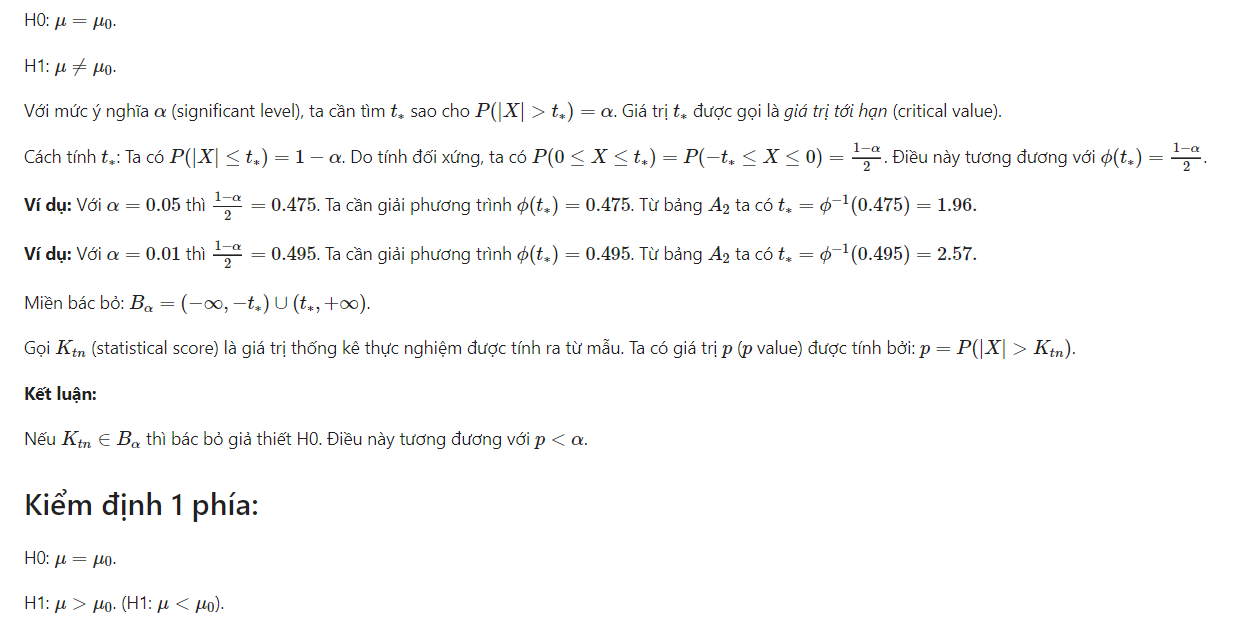

**Tính giá trị tới hạn bằng Python:**

**Thực hành:** Viết hàm tính giá trị tới hạn 1 phía: $\mu>\mu_{0}$ và $\mu<\mu_{0}$ .


In [2]:
# Tính giá trị tới hạn bằng scipy và hàm ppf (hàm ngược của hàm cdf) #
from scipy.stats import norm
import math
def critical_value(alpha, tail=0):
    '''Tính giá trị tới hạn: tail=0:: 2phia; tail=-1:left; tail=1:right'''
    if tail == -1: return (-math.inf,norm.ppf(alpha))
    elif tail == 1: return (norm.ppf(1-alpha),math.inf)
    else: return ((-math.inf,(norm.ppf(alpha/2)), ((norm.ppf(1-alpha/2),math.inf)))

alpha = 0.05
# tu bang A.2 chon t_* = 1.96
# dung ham cdf de tinh gia tri p chinh xac neu t_*=1.96
print(f"Giá trị tới hạn 2 phía: {critical_value(alpha)}")
print(f"Giá trị tới hạn 1 phía (trái): {critical_value(alpha, tail=-1)}")
print(f"Giá trị tới hạn 1 phía (phải): {critical_value(alpha, tail=1)}")
# Khi thi ta chấp nhận t_* = 1.96
# Trong khi thực hành thì ta không chấp nhận t_*=1.96 mà giá trị thực là t_* = 1.959963984540054

SyntaxError: invalid syntax (<ipython-input-2-e208414d8b16>, line 10)

In [3]:
gia_nha_dat_us = pd.read_csv("gia_nha_dat_us.csv")
gia_nha_dat_us.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = gia_nha_dat_us[['MSSubClass', 'MSZoning', 'LotArea', 'SalePrice']]
df.head()

,MSSubClass,MSZoning,LotArea,SalePrice
0,60,RL,8450,208500
1,20,RL,9600,181500
2,60,RL,11250,223500
3,70,RL,9550,140000
4,60,RL,14260,250000


In [13]:
corr = df.corr(method = "pearson")
corr


,MSSubClass,LotArea,SalePrice
MSSubClass,1.000000,-0.139781,-0.084284
LotArea,-0.139781,1.000000,0.263843
SalePrice,-0.084284,0.263843,1.000000


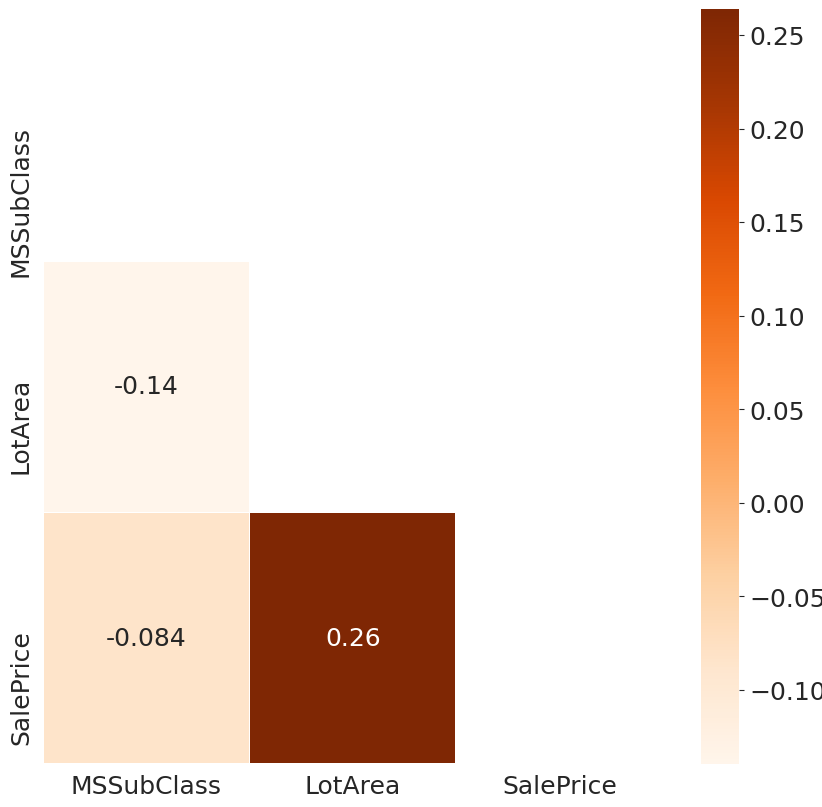

In [14]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax=sns.heatmap(corr, annot=True, mask=mask, cmap='Oranges', linewidths=0.5, linecolor='white')

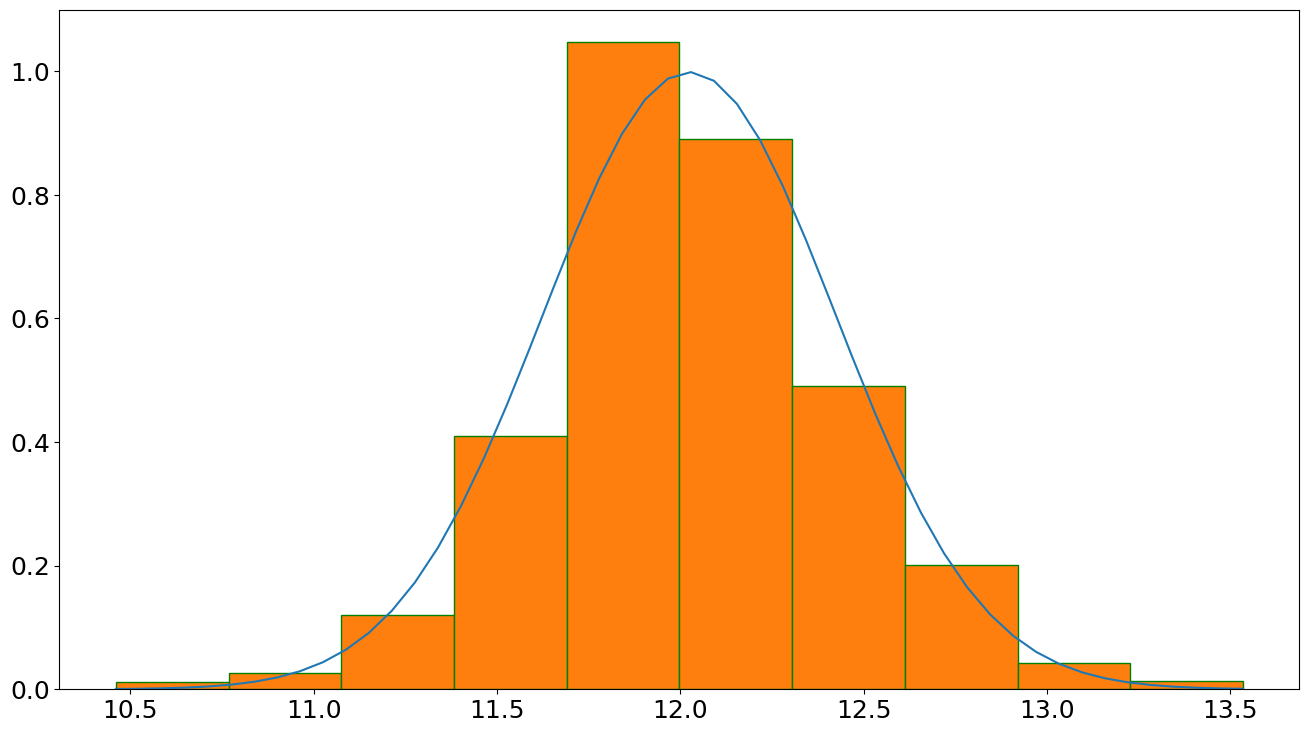

In [5]:
# Engineering feature: log transform #
data = df['SalePrice']
# Sử dụng ln(1+r) ~ r để tránh rate of change #
data = np.log1p(data)

# Kiem tra data co chuan hay khong?
mean = np.mean(data)
# ddof=1 :: hiệu chỉnh
std = np.std(data, ddof=1)
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(data, edgecolor='green', density=True)
plt.show()

In [ ]:
import statsmodels.api as sm
# Đưa dữ liệu về dạng chuẩn tắc #
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

sm.qqplot(standadize(data), line ='45')
plt.show()

**BÀI TOÁN:** Có người cho rằng giá nhà trung bình ở Mỹ là $150k, khẳng định trên có đúng không về mặt thống kê với mức ý nghĩa là 5%?

(Bài toán so sánh giá trị trung bình của mẫu với trung bình kỳ vọng lý thuyết  $\mu_{0}$)

In [ ]:
my_mean = 150000
my_log_mean = np.log1p(my_mean)
my_log_mean

**Giả thiết thống kê**

H0: $\mu=11.918397239722838$

H1: $\mu ≠ 11.918397239722838$

In [ ]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [ ]:
# Lấy ngẫu nhiên 100 điểm dữ liệu
sample = data.sample(n=100)
sample.head()

In [ ]:
#Kiem dinh mean cua sample so voi ky vong mu_0=11.918397239722838
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
from scipy.stats import ttest_1samp
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean)
results(p)

## Kiểm định 1 phía:

In [ ]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben trai: H0 mu = mu_0, H1: mu < mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='less')
results(p)

In [ ]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben phai: H0 mu = mu_0, H1: mu > mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='greater')
results(p)

**BTVN:**

BÀI TOÁN: Có người cho rằng giá nhà trung bình ở Mỹ là $150k, khẳng định trên có đúng không về mặt thống kê với mức ý nghĩa là 5%?

(Bài toán so sánh giá trị trung bình của mẫu với trung bình kỳ vọng lý thuyết  $\mu_{0}$)


**a) Hãy chọn giá trị n lớn hơn 100 khác nhau và chạy các thống kê ở trên để đưa ra kết luận.**

In [ ]:
# Lấy ngẫu nhiên 200 điểm dữ liệu
sample_a = data.sample(n=200)

In [ ]:
# Sử dụng ln(1+r) ~ r để tránh rate of change #
data = sample_a
# Kiem tra data co chuan hay khong?
mean = np.mean(data)
# ddof=1 :: hiệu chỉnh
std = np.std(data, ddof=1)
plt.axvline(mean, color="r", linestyle="dashed", linewidth=2)
_, max_ = plt.ylim()
plt.text(mean , max_ - max_ /20,  "Mean: {:.2f}".format(mean))
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(data, edgecolor='green', density=True)
plt.show()

In [ ]:
import statsmodels.api as sm
# Đưa dữ liệu về dạng chuẩn tắc #
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

sm.qqplot(standadize(data), line ='45')
plt.show()

Kiểm định phân phối của mẫu vừa lấy ra

In [ ]:
print('Kiểm định Shapori:')
stat, p = stats.shapiro(sample_a)
print('stat=%.3f, p=%.3f' % (stat, p))
print('-'*50)
if p > 0.05:
    print('Dữ liệu tuân theo phân phối chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

In [ ]:
my_mean = 150000
my_log_mean = np.log1p(my_mean)
my_log_mean

**Giả thiết thống kê**

H0: $\mu=11.918397239722838$

H1: $\mu ≠ 11.918397239722838$

-> Kiểm định 2 đuôi

In [ ]:
def critical_value(alpha, mean, tail=0):
    '''Tính giá trịmiền bác bỏ: tail=0:: 2phia; tail=-1:left; tail=1:right'''
    if tail == -1: return (-math.inf, norm.ppf(alpha)+mean)
    elif tail == 1: return (norm.ppf(1-alpha)+mean, math.inf)
    else: return ((-math.inf,norm.ppf(alpha/2)+mean), (norm.ppf(1-alpha/2)+mean,math.inf))
a=critical_value(0.05,my_log_mean)
print(f"Miền bác bỏ: {a[0]} và {a[1]}")

In [ ]:
#Kiem dinh mean cua sample so voi ky vong mu_0=11.918397239722838
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
p = {}
p['mean1'] = np.mean(sample_a)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample_a, my_log_mean)
results(p)

**Với giả thiết thống kê**

H0: $\mu=11.918397239722838$

H1: $\mu < 11.918397239722838$

-> Kiểm định 1 đuôi bên trái

In [ ]:
# kiem dinh ben trai: H0 mu = mu_0, H1: mu < mu_0
print(f"Miền bác bỏ:{critical_value(alpha,my_log_mean, tail=-1)}")
print('-'*50)
p = {}
p['mean1'] = np.mean(sample_a)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample_a, my_log_mean, alternative='less')
results(p)

**Với giả thiết thống kê**

H0: $\mu=11.918397239722838$

H1: $\mu > 11.918397239722838$

-> Kiểm định 1 đuôi bên phải

In [ ]:
# kiem dinh ben phai: H0 mu = mu_0, H1: mu > mu_0
print(f"Miền bác bỏ:{critical_value(alpha,my_log_mean, tail=1)}")
print('-'*50)
p = {}
p['mean1'] = np.mean(sample_a)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample_a, my_log_mean, alternative='greater')
results(p)

**b) Hãy thay đổi my_mean khác nhau để tìm ra được giá trị kỳ vọng gần với giá trị trung bình của mẫu (với mức ý nghĩa: 0.05)**

- **Với my_mean = 165000**

In [ ]:
my_mean = 165000
my_log_mean = np.log1p(my_mean)
print(my_log_mean)

**Giả thiết thống kê**

H0: $\mu=12.013706813470414$

H1: $\mu ≠ 12.013706813470414$

**-> Kiểm định 2 đuôi**

In [ ]:
#Miền bác bỏ:
a=critical_value(0.05,my_log_mean)
print(f"Miền bác bỏ: {a[0]} và {a[1]}")
print('-'*50)
#Kiem dinh mean cua sample so voi ky vong mu_0=11.918397239722838
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
p = {}
p['mean1'] = np.mean(sample_a)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample_a, my_log_mean)
results(p)